#### `validation curve` - We plot train and test accuracy as function of hyperparameters, eg: as inverse regularization parameter C.

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)


In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values

y = df.loc[:, 1].values


In [4]:
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_


array(['B', 'M'], dtype=object)

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y,random_state=1)

#### Combining transformers and estimators in a pipeline

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [8]:
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',max_iter=10000))

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import numpy as np


In [10]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',
                                param_range=param_range,cv=10)

In [11]:
train_scores

array([[0.89486553, 0.88508557, 0.88997555, 0.88753056, 0.89242054,
        0.88536585, 0.88536585, 0.89268293, 0.88780488, 0.8902439 ],
       [0.95110024, 0.94376528, 0.95354523, 0.94865526, 0.95599022,
        0.95121951, 0.94634146, 0.95365854, 0.94634146, 0.94878049],
       [0.98777506, 0.98533007, 0.98288509, 0.9804401 , 0.99022005,
        0.98780488, 0.98536585, 0.9804878 , 0.98536585, 0.98292683],
       [0.98777506, 0.98777506, 0.99022005, 0.99022005, 0.99022005,
        0.9902439 , 0.9902439 , 0.98780488, 0.9902439 , 0.98780488],
       [0.98533007, 0.98777506, 0.98533007, 0.99266504, 0.99266504,
        0.9902439 , 0.9902439 , 0.9902439 , 0.9902439 , 0.98780488],
       [0.99022005, 0.99266504, 0.99022005, 0.99511002, 1.        ,
        0.9902439 , 0.9902439 , 0.99268293, 0.99512195, 0.98780488]])

In [12]:
test_scores

array([[0.80434783, 0.95652174, 0.86956522, 0.91304348, 0.86956522,
        0.91111111, 0.97777778, 0.84444444, 0.86666667, 0.84444444],
       [0.93478261, 1.        , 0.91304348, 0.93478261, 0.91304348,
        0.95555556, 0.97777778, 0.88888889, 0.97777778, 0.93333333],
       [0.97826087, 1.        , 0.95652174, 0.95652174, 0.95652174,
        0.95555556, 0.97777778, 1.        , 1.        , 0.97777778],
       [1.        , 0.97826087, 1.        , 0.97826087, 0.93478261,
        0.95555556, 0.97777778, 0.97777778, 1.        , 1.        ],
       [0.95652174, 0.97826087, 0.97826087, 0.95652174, 0.93478261,
        0.95555556, 0.97777778, 0.97777778, 1.        , 1.        ],
       [0.95652174, 0.95652174, 0.97826087, 0.93478261, 0.93478261,
        0.97777778, 0.95555556, 0.93333333, 0.95555556, 0.97777778]])

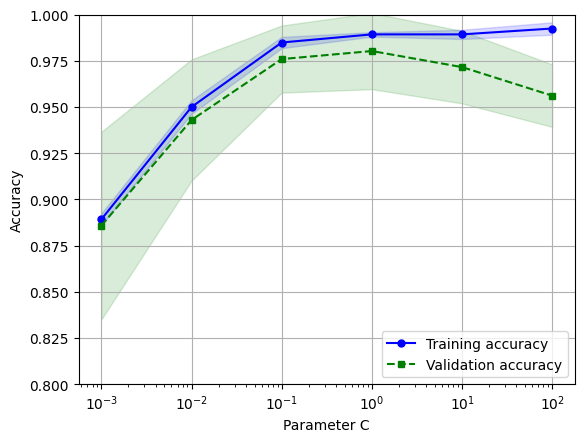

In [13]:
train_mean = np.mean(train_scores, axis=1)

train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)

test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,color='blue', marker='o', markersize=5, label='Training accuracy')

plt.fill_between(param_range,train_mean + train_std,train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')

plt.grid()

plt.xscale('log')

plt.legend(loc='lower right')

plt.xlabel('Parameter C')

plt.ylabel('Accuracy')

plt.ylim([0.8, 1.0])

plt.show()


##### Although the differences in the accuracy for varying values of C are subtle, we can see that the model slightly underfits the data when we increase the regularization strength (small values of C). However, for large values of C, it means lowering the strength of regularization, so the model tends to slightly overfit the data. In this case, the sweet spot appears to be between 0.1 and 1.0 of the C value.